Примением AutoML подход для временных рядов и автоматически подберем наиболее продуктивный подход через AutoTS

![Auto-TS](1_15.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autots
from auto_ts import auto_timeseries
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y')

Imported auto_timeseries version:0.0.68. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [3]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.02.csv",
                   delimiter=";", header=0, names=["Дата", "Курс", "Ипотека"], date_parser=dateparse, parse_dates=['Дата'])
data = data[::-1].reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Курс,Ипотека
0,2022-01-11,75.1315,9.84
1,2022-01-12,74.8355,9.84
2,2022-01-13,74.5277,9.84
3,2022-01-14,74.5686,9.84
4,2022-01-15,75.7668,9.84


## Строим модель

Start of Fit.....
    Auto_TS Machine Learning models can handle multi-label targets = ['Курс', 'Ипотека']
        However, ARIMA, VAR and FB Prophet cannot handle Multi-Label. Hence taking first column = ['Курс', 'Ипотека'] as target.
Start of loading of data.....
    Inputs: ts_column = Дата, sep = ,, target = ['Курс', 'Ипотека']
    Using given input: pandas dataframe...
    Дата column exists in given train data...
    train data shape = (149, 2)
Alert: Could not detect strf_time_format of Дата. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


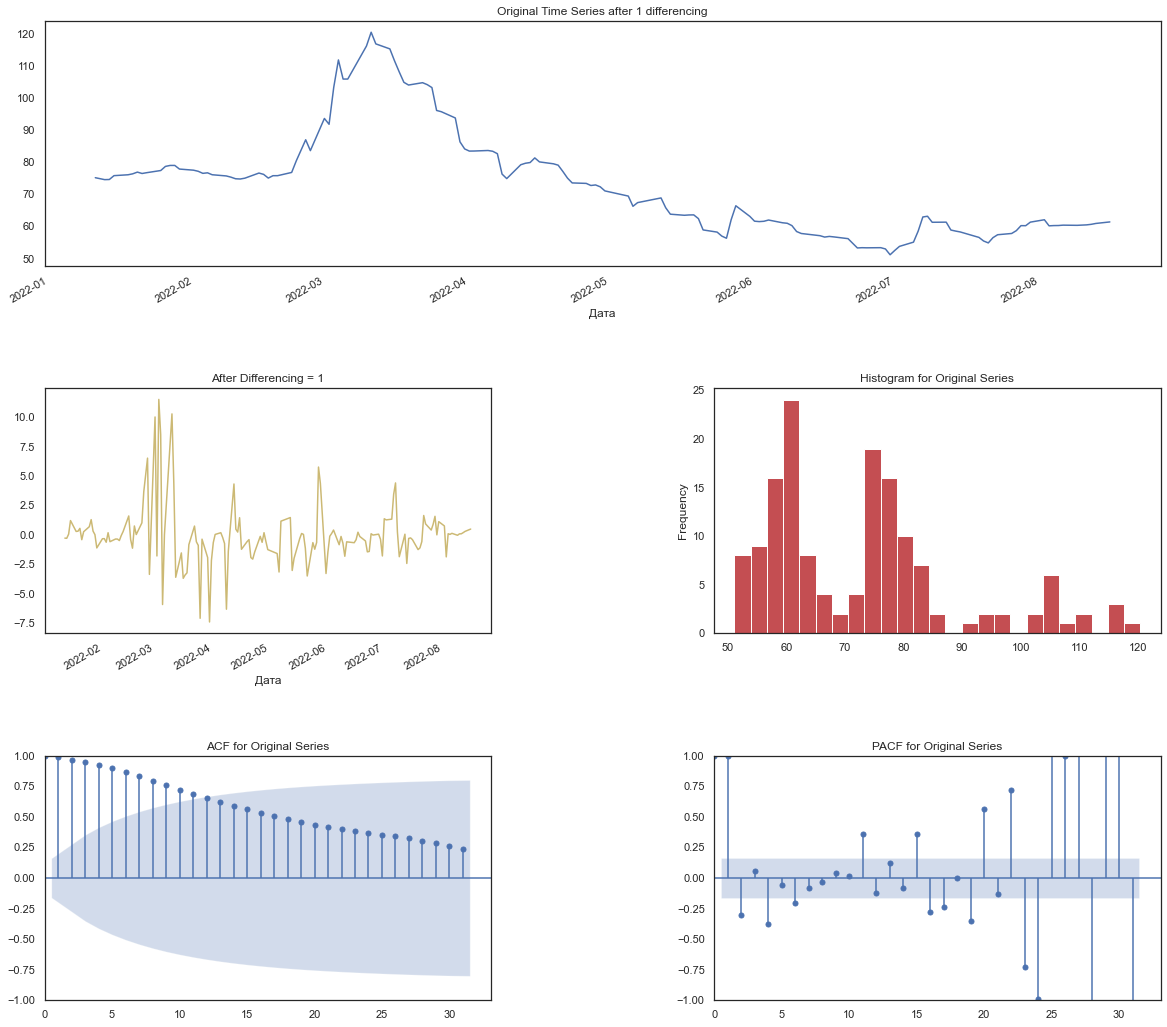

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building VAR Model - best suited for small datasets < 1000 rows and < 10 columns



Running VAR Model...
    Shifting 1 predictors by 1 to align prior predictor values with current target values...

Fold Number: 1 --> Train Shape: 123 Test Shape: 5

Additional Variable in VAR model = Ипотека
 Iteration 1 completed
 Iteration 2 completed
 Iteration 3 completed
 Iteration 4 completed
 Iteration 5 completed
 Iteration 6 completed
 Iteration 7 completed
 Iteration 8 completed
 Iteration 9 completed
 Iteration 10 completed
 Iteration 11 completed
 Iteration 12 completed
 Iteration 13 completed
 Iteration 14 completed
 Iteration 15 completed
 Iteration 16 completed
    Best AR order p = 2, MA order q = 3, Interim metric = 879.250
Best variable selected for VAR: Ипотека
    RMSE = 4.43
    Std Deviation of actuals = 0.80
    Normalized RMSE (as pct of std dev) = 27%

Fold Number: 2 --> Trai

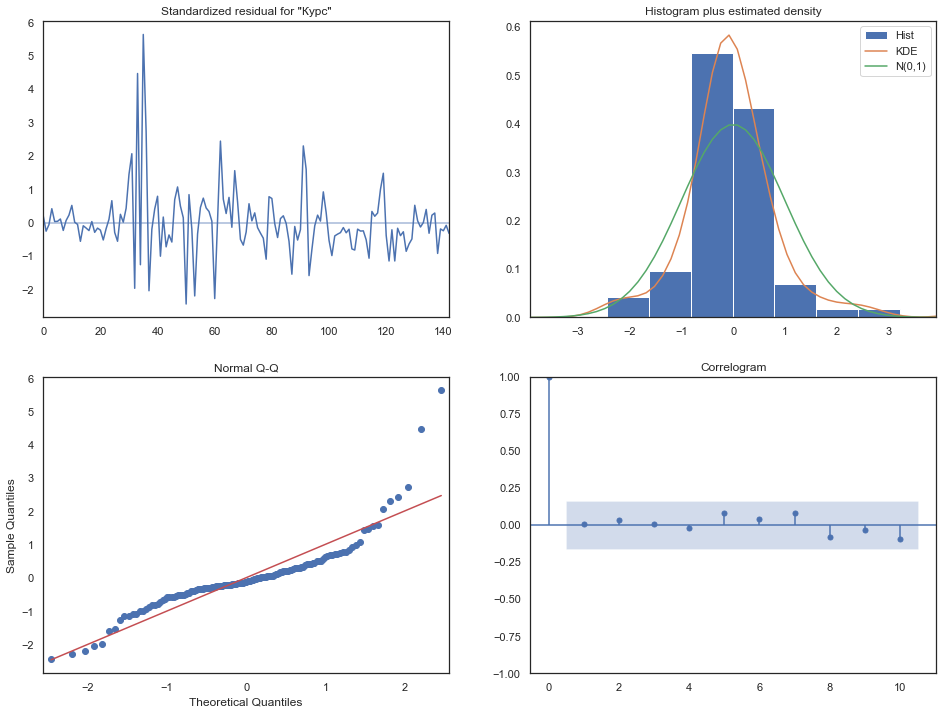

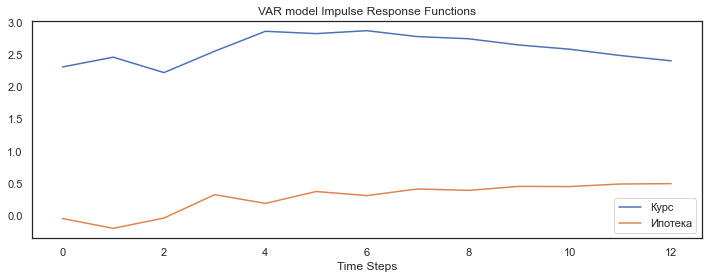

In [4]:
model = auto_timeseries(score_type='rmse',
        time_interval='D', non_seasonal_pdq=None, seasonality=True,
        seasonal_period=5, model_type=['VAR'], verbose=2, dask_xgboost_flag=0)
model.fit(data[:-10], "Дата", ["Курс", "Ипотека"])

## Визуализация результата

In [5]:
predictions = model.predict(testdata = 10, model = 'best')
predictions["yhat"].tail()

Predicting using forecast period=10 as input for VAR model


153    64.370385
154    64.887404
155    65.410705
156    65.928540
157    66.445420
Name: yhat, dtype: float64

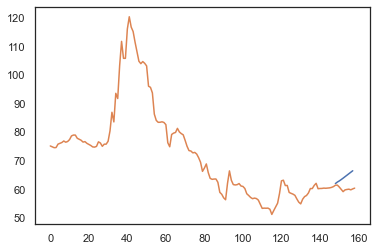

In [6]:
plt.plot(predictions["yhat"])
plt.plot(data["Курс"])
plt.show()

Оценим ошибку

In [7]:
print ("Ошибка модели:", smape(data["Курс"][-10:], predictions["yhat"]))

Ошибка модели: 62.2542979035577
